# Artificial Neural Networks
#### Geo-Demographic Segmentation

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Part 1 - Data Preprocessing

### Data Loading

In [3]:
PATH = "../../../Deep_Learning/ANN/Python/Churn_Modelling.csv"

In [4]:
dataset = pd.read_csv(PATH)

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

### Encoding the Categorical Variables

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', 
                                      OneHotEncoder(), [1])], 
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Model Building

In [11]:
print(X_train.shape)

(8000, 12)


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(42)

ann = Sequential()
ann.add(Dense(6, activation='relu', input_shape=(12, )))
ann.add(Dense(3, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', 
            metrics=['accuracy'])

## Part 3 - Model Training

In [13]:
epochs = 100
batch_size = 32
ann.fit(X_train, y_train, batch_size=batch_size , epochs=epochs)

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 90us/sample - loss: 0.5700 - accuracy: 0.7456
Epoch 2/100
8000/8000 [==============================] - 0s 49us/sample - loss: 0.4709 - accuracy: 0.7968
Epoch 3/100
8000/8000 [==============================] - 0s 48us/sample - loss: 0.4464 - accuracy: 0.8056
Epoch 4/100
8000/8000 [==============================] - 0s 47us/sample - loss: 0.4368 - accuracy: 0.8089
Epoch 5/100
8000/8000 [==============================] - 0s 47us/sample - loss: 0.4308 - accuracy: 0.8131
Epoch 6/100
8000/8000 [==============================] - 0s 47us/sample - loss: 0.4260 - accuracy: 0.8141
Epoch 7/100
8000/8000 [==============================] - 0s 47us/sample - loss: 0.4209 - accuracy: 0.8179
Epoch 8/100
8000/8000 [==============================] - 0s 48us/sample - loss: 0.4151 - accuracy: 0.8219
Epoch 9/100
8000/8000 [==============================] - 0s 48us/sample - loss: 0.4069 - accuracy: 0.8260
Epoch 10/100
8000/8000 [

## Part 4 - Model Evaluation

### History

In [14]:
history = ann.history.history
loss = history['loss']
accuracy = history['accuracy']

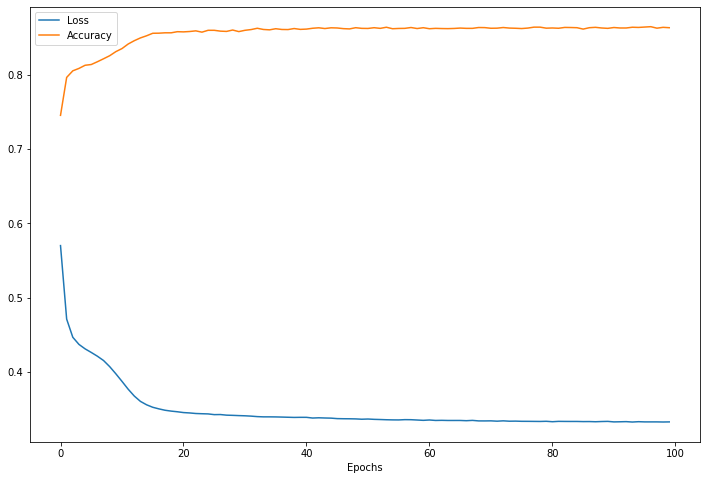

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(loss, label='Loss')
plt.plot(accuracy, label='Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.show()

### Prediction

In [16]:
sample = [[600, 'France', 'Male', 40, 3, 60000, 2, 1, 1, 50000]]

sample = np.array(sample)
sample[:, 2] = le.transform(sample[:, 2])
sample = np.array(ct.transform(sample))
sample = sc.transform(sample)

In [17]:
print(ann.predict(sample) > 0.5)

[[False]]


In [18]:
y_pred = ann.predict_classes(X_test)
print(np.concatenate((y_test.reshape(len(y_pred),1), y_pred.reshape(len(y_pred),1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [1 0]
 [1 0]]


### Confusion Matrix

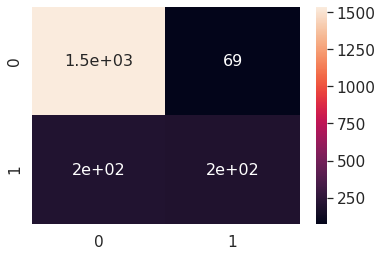

In [19]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

### Accuracy Score

In [20]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8665